# Examing SVMs

Q1a). I think the plot showing the SVC with RBF kernel best expresses this dataset. The reason being that the decision boundary better separates the different classes/types of flowers between each other based on the pair of attributes given.

Automatically created module for IPython interactive environment


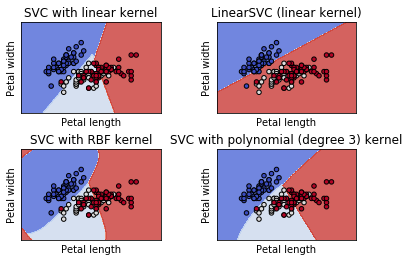

In [13]:
# Q1b).
# Taken directly from the Plot page described in practical sheet


print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the last two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 0.001  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# For petal length vs. petal width. The decision boundaries are a lot nicer for all 4 SVMs and they easily divded up
# the dataset appropriately

Q1c. Increasing the value of the C parameter, the pentaly for mis-classified examples will alter the decision boundary in the following ways:
- The higher the value, the more the decision boundaries tend to distort to try and fit with the data
- The lower the value the less the decision boundary will contort and mis-classification also greatly increases.
- For the completely linear SVC this results in basically only 2 decision boundaries compared to the 3 that were originally there when the C parameter was set to 1.0

In [17]:
# Calculating the accuracies

# SVC with linear kernel
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X,y)
print(clf.score(X,y))

# LinearSVC
clf = svm.LinearSVC(C=C)
clf.fit(X,y)
print(clf.score(X,y))

# SVC with RBF kernel
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X,y)
print(clf.score(X,y))

# SVC with polynomial (degree 3) kernel
clf = svm.SVC(kernel='poly', degree=3, C=C)
clf.fit(X,y)
print(clf.score(X,y))


0.76
0.646666666667
0.806666666667
0.806666666667


Q1d). The last 2 SVCs might be overfitting the data

In [32]:
# Question 2 calculating accuracies for the different classifiers
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def ave_cross_val_score(classifier, x, y, n):
    sum = 0
    scores = cross_val_score(classifier, x, y, cv=n)
    for i in range(n):
        sum += scores[i]
    return sum/n

X = iris.data

# One-R
one_r = DecisionTreeClassifier(max_depth=1)
one_r.fit(X,y)
print('One-R')
print(one_r.score(X,y))
print(ave_cross_val_score(one_r, X, y, 10))
print()

# 1-Nearest Neighbour
one_nn = KNeighborsClassifier(n_neighbors=1)
one_nn.fit(X,y)
print('1-Nearest Neighbour')
print(one_nn.score(X,y))
print(ave_cross_val_score(one_nn, X, y, 10))
print()

# 5-Nearest Neighbour
five_nn = KNeighborsClassifier(n_neighbors=5)
five_nn.fit(X,y)
print('5-Nearest Neighbour')
print(five_nn.score(X,y))
print(ave_cross_val_score(five_nn, X, y, 10))
print()

# Decision tree
dt = DecisionTreeClassifier(max_depth=None)
dt.fit(X,y)
print('Decision tree')
print(dt.score(X,y))
print(ave_cross_val_score(dt, X, y, 10))
print()

# LinearSVC()
lin_svc = svm.LinearSVC()
lin_svc.fit(X,y)
print('LinearSVC()')
print(lin_svc.score(X,y))
print(ave_cross_val_score(lin_svc, X, y, 10))
print()

# SVM with cubic kernel
cubic_svc = svm.SVC(kernel='poly', degree=3)
cubic_svc.fit(X,y)
print('SVM with a cubic kernel')
print(cubic_svc.score(X,y))
print(ave_cross_val_score(cubic_svc, X, y, 10))
print()

# SVM with an RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7)
rbf_svc.fit(X,y)
print('SVM with an RBF kernel')
print(rbf_svc.score(X,y))
print(ave_cross_val_score(rbf_svc, X, y, 10))
print()

One-R
0.666666666667
0.666666666667

1-Nearest Neighbour
1.0
0.96

5-Nearest Neighbour
0.966666666667
0.966666666667

Decision tree
1.0
0.953333333333

LinearSVC()
0.966666666667
0.966666666667

SVM with a cubic kernel
0.98
0.973333333333

SVM with an RBF kernel
0.98
0.973333333333

